In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Gather URLs of each class of images
I go to https://images.google.com/ and I type in neem and I just scroll through until I find a goodly bunch of them. Okay, that looks like plenty of teddy bears to me.

hit CtrlShiftJ in Windows/Linux and CmdOptJ in Mac, and you paste the following into the window that appears:

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));




In [0]:
from google.colab import drive
drive.mount('/content/drive' )

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


we now need to download those URLs to our server. Because remember when we're using Jupyter Notebook, it's not running on our computer. It's running on SageMaker or Crestle, or Google cloud, etc. So to do that, we start running some Jupyer cells. Let's grab the fastai library:

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
# download neem images
# folder = 'neem'
# file = 'neem.txt'

In [0]:
# download bargad images
# folder = 'bargad'
# file = 'bargad.txt'


In [0]:
# download tulsi images
# folder = 'tulsi'
# file = 'tulsi.txt'


In [0]:
# creating folder for each class
# path = Path('drive/My Drive/fastai/leaf_types')
# dest = path/folder
# dest.mkdir(parents=True, exist_ok=True)

In [0]:
# download images for each class
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/file, dest, max_pics=20, max_workers=0)
# download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['neem','bargad','tulsi']

Removing irrelevent images:

remove the images that aren't actually images at all. This happens all the time. There's always a few images in every batch that are corrupted for whatever reason. Google image told us this URL had an image but it doesn't anymore. So we got this thing in the library called verify_images which will check all of the images in a path and will tell you if there's a problem. If you say delete=True, it will actually delete it for you. So that's a really nice easy way to end up with a clean dataset.


In [0]:
path= 'drive/My Drive/fastai/leaf_types'

In [0]:
# for c in classes:
#     print(c)
#     verify_images(path/c, delete=True, max_workers=8)

Create ImageDataBunch-
 
 I have the basic structure we need to create an ImageDataBunch to start doing some deep learning. 


Whenever we create a data bunch, if we don't have a separate training and validation set, then we can just say the training set is in the current folder (i.e. . because by default, it looks in a folder called train).
 whenever we create a validation set randomly, we always set  random seed to something fixed beforehand. This means that every time we run this code, we'll get the same validation set. 
 
 It is important is that we always have the same validation set. Otherwise when we are trying to decide has this hyper parameter change improved my model but we've got a different set of data we are testing it on, then we don't know maybe that set of data just happens to be a bit easier. So that's why we always set the random seed here.

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
data.classes

['bargad', 'neem', 'tulsi']

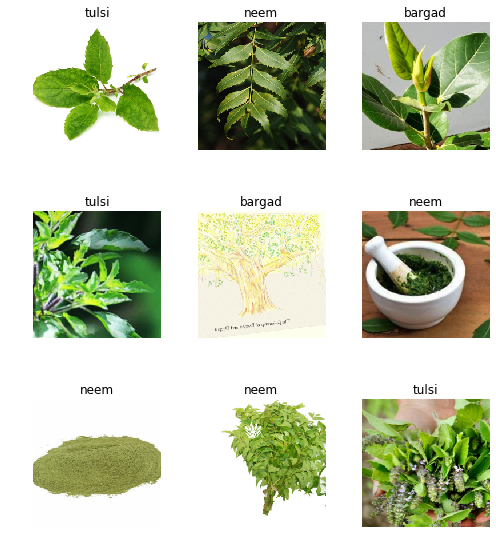

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bargad', 'neem', 'tulsi'], 3, 464, 115)

In [0]:
# Training a model
# resnet34
# To create a ResNET 50 with pretrained weights
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 109994584.71it/s]


In [0]:
learn.fit_one_cycle(5)
# The default learning rate is 0.003 

epoch,train_loss,valid_loss,error_rate,time
0,1.267158,0.724202,0.330435,00:52
1,0.887041,0.377630,0.191304,00:18
2,0.668508,0.326066,0.121739,00:19
3,0.555883,0.330998,0.139130,00:19
4,0.463235,0.329135,0.121739,00:19


If you know the details of your architecture and want to do something in between unfreeze and freeze you can use freeze_to(n:int) to specify which layer groups you want to freeze and which you want to train. The first n layer groups will be frozen and the last n layer groups will be unfrozen.

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


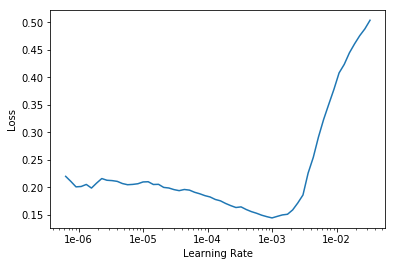

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, max_lr=slice(3e-05,3e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.212697,0.268337,0.113043,00:20
1,0.180742,0.276704,0.113043,00:19
2,0.141554,0.277379,0.113043,00:20


In [0]:
learn.save('model_after_freezing-1')

In [0]:
learn.load('model_after_freezing-1')

Learner(data=ImageDataBunch;

Train: LabelList (464 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
neem,neem,neem,neem,neem
Path: drive/My Drive/fastai/leaf_types;

Valid: LabelList (115 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bargad,tulsi,tulsi,tulsi,bargad
Path: drive/My Drive/fastai/leaf_types;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, mom

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

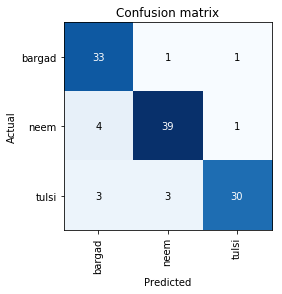

In [0]:
interp.plot_confusion_matrix()

In [0]:
from fastai.widgets import *

# losses,idxs = interp.top_losses()
# top_loss_paths = data.valid_ds.x[idxs]

In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, path)